In [ ]:
# prompt: import trimesh
!pip install trimesh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 707.0/707.0 kB 10.1 MB/s eta 0:00:00


In [ ]:
import os
import glob
import trimesh
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from matplotlib import pyplot as plt
from tqdm import tqdm
from google.colab import drive
import pandas as pd


In [ ]:
# Link with drive to upload otolith files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:

VAL_SPLIT = 0.2 # data of validation is 20%
NUM_SAMPLE_POINTS = 2048
BATCH_SIZE = 2
EPOCHS = 50
INITIAL_LR = 1e-3 #learning rate
LABELS = ["otolithe","sulcus"]
COLORS = ["red","blue"]

# Définition des chemins
DATA_DIR = "/content/drive/MyDrive/otolithes"
OTOPLY = os.path.join(DATA_DIR, "otolithe")
SULCUS = os.path.join(DATA_DIR, "sulcus")

print(OTOPLY)

/content/drive/MyDrive/otolithes/otolithe


In [ ]:
train_points = [] #contient une liste des otolithes complets, chaque otolithe est representé par une liste de nuages
test_points = []
#Ce qui nous as pris beaucoup du temps c'est de comprendre la structure des nuages de points
point_cloud_labels, all_labels = [], []
def parse_dataset(num_points=2048):

    folder = OTOPLY
    sulcus_folder = SULCUS

    distance_threshold = 0.19  # On a testé
    print(f"processing class: {folder}")

    # Obtenir les fichier et les trier
    train_files = glob.glob(os.path.join(folder, "*"))
    sulcus_files = glob.glob(os.path.join(sulcus_folder, "*"))
    train_files = sorted(train_files)
    sulcus_files = sorted(sulcus_files)

    for i in range(0, len(train_files)):

        #chargement et echantillage des maillages 3D
        pcd_otolithe = trimesh.load(train_files[i]).sample(num_points)
        pcd_sulcus = trimesh.load(sulcus_files[i]).sample(num_points)
        print('les coordonnées du nuage de points du Sulcus ')
        print(i)
        print(" sont: \n")
        print(pcd_sulcus)
        print("\n")
        #print('les coordonnées du nuage de points du sulcus '+str(i)+" sont: \n"+pcd_sulcus++"\n")


        labels = []
        train_points.append(pcd_otolithe)

        # Labelisation
        for i, point_oto1 in enumerate(pcd_otolithe):
            distances = np.linalg.norm(pcd_sulcus - point_oto1,axis=1)

            min_distance = np.min(distances)

            if min_distance < distance_threshold:
                labels.append("sulcus")
            else:
                labels.append("otolithe")

        label_data = [
            LABELS.index(label) if label != "none" else len(LABELS)
            for label in labels
        ]
        # One-hot encoding (transform catrgories to numeric binary values)
        label_data = keras.utils.to_categorical(label_data, num_classes=len(LABELS) + 1)

        point_cloud_labels.append(label_data)

        all_labels.append(labels)
        #print(point_cloud_labels)
# train_points, test_points, train_labels, test_labels, class_map = parse_dataset(num_points=2048)

# res = parse_dataset(num_points=2048)
        #print(train_points)
parse_dataset(2048)


processing class: /content/drive/MyDrive/otolithes/otolithe
les coordonnées du nuage de points du Sulcus 
0
 sont: 

[[4.49005471 4.82207683 2.37920903]
 [4.66457842 4.83251433 2.85239134]
 [4.53613508 4.85838055 3.35153578]
 ...
 [4.41642634 5.05876199 3.40700597]
 [4.74092144 4.78592643 2.16947449]
 [4.75591868 4.82837832 2.13032117]]


les coordonnées du nuage de points du Sulcus 
1
 sont: 

[[4.29658953 4.44758178 8.93288035]
 [4.37189227 4.26401916 8.51681193]
 [4.75101691 4.34342127 7.98626019]
 ...
 [4.38296595 4.40247227 8.88243446]
 [4.24200303 4.29257184 8.86239031]
 [4.28237065 4.56492811 9.11299626]]


les coordonnées du nuage de points du Sulcus 
2
 sont: 

[[ 4.85225609  3.92285607 12.97306796]
 [ 3.97084558  4.18262937 14.26133886]
 [ 4.96044275  3.60840173 12.94205304]
 ...
 [ 4.69362207  3.76729794 13.62867861]
 [ 4.46586958  3.74905906 13.54881995]
 [ 4.17515408  4.08539551 14.17315336]]


les coordonnées du nuage de points du Sulcus 
3
 sont: 

[[ 4.8693481   3.54523

In [ ]:
# calculer le volume de l'otolithe avec un exemple

import numpy as np

def calculate_otolith_volume(point_cloud):
  """Calculates the approximate volume of an otolith from a point cloud.

  Args:
    point_cloud: A NumPy array of shape (N, 3) representing the 3D coordinates
      of the points in the point cloud.

  Returns:
    The estimated volume of the otolith.
  """

  # Use the convex hull to approximate the otolith's shape.
  hull = trimesh.convex.convex_hull(point_cloud)

  # Calculate the volume of the convex hull.
  volume = hull.volume

  return volume

# Example usage (assuming 'train_points' is defined as in your code):

if 'train_points' in locals() and len(train_points)>0:

  # Calculate the volume
  for i in range(len(train_points)):
    volume = calculate_otolith_volume(train_points[i])
    print(f"The estimated volume of the otolith {i+1} is: {volume}")

else:
    print("train_points is not defined or empty. Please run the data loading part of your code first.")

The estimated volume of the otolith 1 is: 0.44697474553603733
The estimated volume of the otolith 2 is: 0.49615036867865997
The estimated volume of the otolith 3 is: 0.4562742285105552
The estimated volume of the otolith 4 is: 0.4162154608019781
The estimated volume of the otolith 5 is: 0.5005417355570451
The estimated volume of the otolith 6 is: 0.4218925585801659
The estimated volume of the otolith 7 is: 0.4318465147332415
The estimated volume of the otolith 8 is: 0.47696043577951913
The estimated volume of the otolith 9 is: 0.44638204743467363
The estimated volume of the otolith 10 is: 0.4612389066807665
The estimated volume of the otolith 11 is: 0.49582846891967153
The estimated volume of the otolith 12 is: 0.6156590186384768
The estimated volume of the otolith 13 is: 0.5532232224178909
The estimated volume of the otolith 14 is: 0.4397727304523766
The estimated volume of the otolith 15 is: 0.47489306064135933
The estimated volume of the otolith 16 is: 0.5076651683786689
The estimat

In [ ]:
for p in all_labels:
    print(p)

['otolithe', 'sulcus', 'sulcus', 'otolithe', 'otolithe', 'otolithe', 'sulcus', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'sulcus', 'otolithe', 'otolithe', 'sulcus', 'otolithe', 'sulcus', 'otolithe', 'otolithe', 'sulcus', 'sulcus', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'sulcus', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'sulcus', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'sulcus', 'sulcus', 'otolithe', 'otolithe', 'otolithe', 'sulcus', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'sulcus', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'sulcus', 'otolithe', 'otolithe', 'sulcus', 'sulcus', 'sulcus', 'sulcus', 'otolithe', 'otolithe', 'sulcus', 'sulcus', 'sulcus', 'sulcus', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', 'otolithe', '

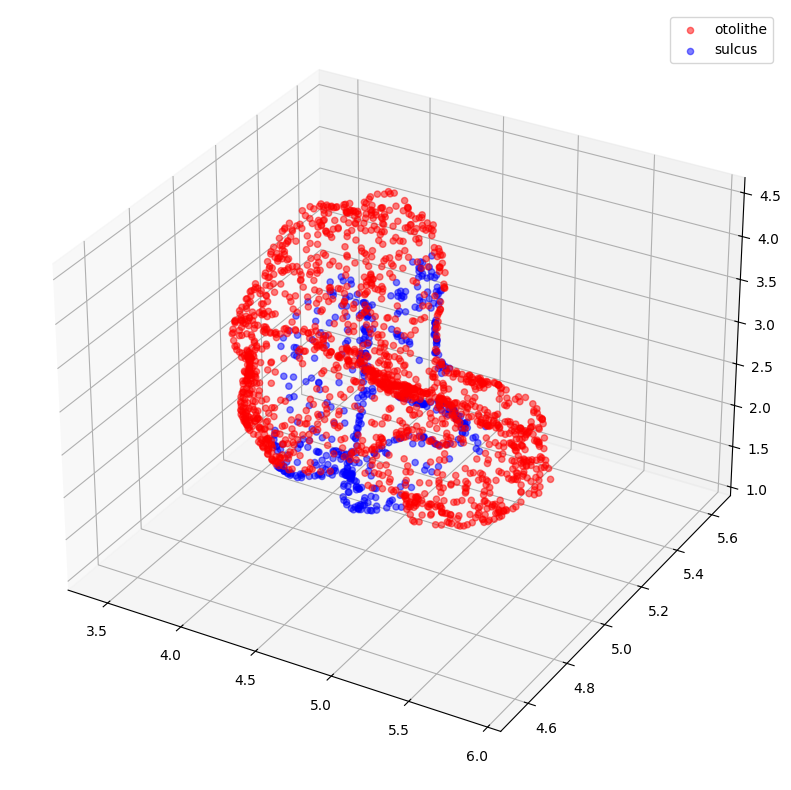

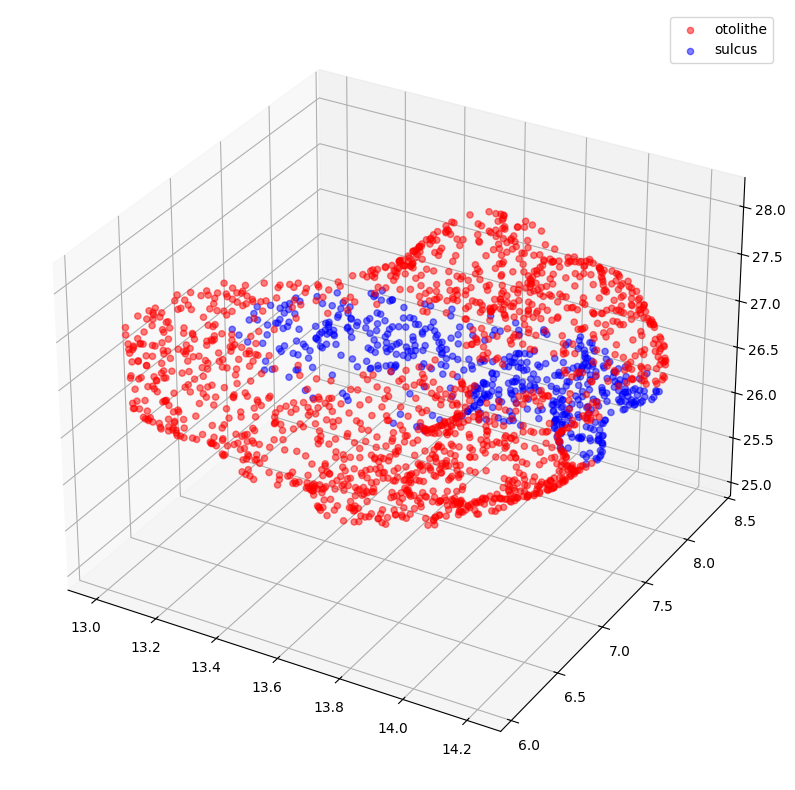

In [ ]:
#visualisation 3D des nuages de points des otolithes

def visualize_data(point_cloud, labels):
    df = pd.DataFrame(
        data={
            "x": point_cloud[:, 0],
            "y": point_cloud[:, 1],
            "z": point_cloud[:, 2],
            "label": labels,
        }
    )

    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection="3d")

    for index, label in enumerate(np.unique(labels)):  # Iterate over unique labels
        c_df = df[df["label"] == label]
        ax.scatter(
            c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
        )

    ax.legend()
    plt.show()

# Example usage with corrected indexing:
visualize_data(train_points[0], all_labels[0])
visualize_data(train_points[15], all_labels[15])

In [ ]:
#pretraitement des nuages (en faisant la normalisation)
import random


for index in tqdm(range(len(train_points))):
    current_point_cloud = train_points[index]
    current_label_cloud = point_cloud_labels[index]
    current_labels = all_labels[index]
    num_points = len(current_point_cloud)
    # Randomly sampling respective indices.
    # sampled_indices = random.sample(list(range(num_points)), NUM_SAMPLE_POINTS)
    sampled_indices = list(range(num_points))
    # Sampling points corresponding to sampled indices.
    sampled_point_cloud = np.array([current_point_cloud[i] for i in sampled_indices])
    # Sampling corresponding one-hot encoded labels.
    sampled_label_cloud = np.array([current_label_cloud[i] for i in sampled_indices])
    # Sampling corresponding labels for visualization.
    sampled_labels = np.array([current_labels[i] for i in sampled_indices])
    # Normalizing sampled point cloud.
    norm_point_cloud = sampled_point_cloud - np.mean(sampled_point_cloud, axis=0)
    norm_point_cloud /= np.max(np.linalg.norm(norm_point_cloud, axis=1))
    #coordonnées normalisées affichées
    print('les coordonnées du nuage de points l\'otolithe ')
    print(" sont: \n")
    print(norm_point_cloud)
    print("\n")
    train_points[index] = norm_point_cloud
    point_cloud_labels[index] = sampled_label_cloud
    all_labels[index] = sampled_labels

 35%|███▍      | 8/23 [00:00<00:00, 71.60it/s]

les coordonnées du nuage de points l'otolithe 
 sont: 

[[ 0.26547927 -0.04452943  0.74395666]
 [ 0.14647185 -0.10826156 -0.48400081]
 [ 0.0621959   0.16519636 -0.48580542]
 ...
 [ 0.37372306 -0.00547952  0.20452345]
 [ 0.6040162  -0.05965834 -0.06226607]
 [-0.3842343  -0.05988419 -0.26252706]]


les coordonnées du nuage de points l'otolithe 
 sont: 

[[-4.04824029e-02 -1.07830744e-01  7.24440957e-01]
 [-2.01762216e-01 -3.06539725e-02  4.16148641e-01]
 [ 9.95397820e-02 -7.96215767e-02  7.41887807e-01]
 ...
 [ 6.34462972e-01 -1.32356491e-01 -2.57377144e-04]
 [ 1.68860148e-01 -2.79264033e-02  3.98124758e-01]
 [ 1.02162983e-01  4.98078704e-02 -8.47472149e-01]]


les coordonnées du nuage de points l'otolithe 
 sont: 

[[ 0.03321419 -0.19176763 -0.024622  ]
 [ 0.125452    0.01544766 -0.15415243]
 [-0.27513836  0.2410875   0.00437795]
 ...
 [-0.15313568 -0.16272573 -0.13132603]
 [ 0.38007155 -0.09777334 -0.52718082]
 [-0.08336933  0.1078926   0.0342286 ]]


les coordonnées du nuage de points

100%|██████████| 23/23 [00:00<00:00, 83.25it/s]

les coordonnées du nuage de points l'otolithe 
 sont: 

[[-0.08270754 -0.43893209  0.12564998]
 [-0.26438976 -0.35277495 -0.20773879]
 [-0.05460161  0.31393915  0.07359312]
 ...
 [ 0.11578695  0.44150677 -0.04473856]
 [ 0.28942278  0.27598252  0.48496115]
 [ 0.00688646  0.20165756  0.53803167]]


les coordonnées du nuage de points l'otolithe 
 sont: 

[[-0.24818961 -0.22987699  0.38624952]
 [-0.10666008 -0.38210626 -0.4253735 ]
 [ 0.26978535  0.52691697  0.60609909]
 ...
 [ 0.17803987  0.54669688  0.12923495]
 [ 0.12427349  0.3617391   0.79554782]
 [ 0.00830478 -0.00796971 -0.13565153]]


les coordonnées du nuage de points l'otolithe 
 sont: 

[[-0.18397275 -0.19481808  0.62964661]
 [-0.14519776 -0.42614952 -0.55951795]
 [-0.03232637  0.39357253 -0.21968498]
 ...
 [-0.17149317 -0.0023839  -0.38602489]
 [-0.03145484 -0.35766726 -0.05923101]
 [-0.27377694 -0.34353502  0.32524092]]


les coordonnées du nuage de points l'otolithe 
 sont: 

[[ 0.00668391  0.32278008 -0.37093438]
 [ 0.210570

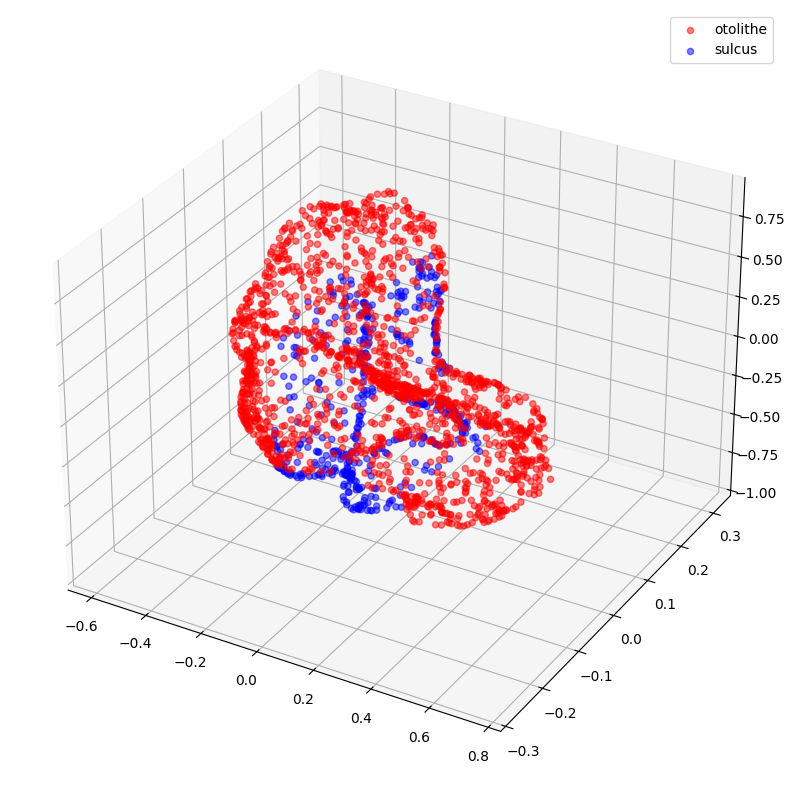

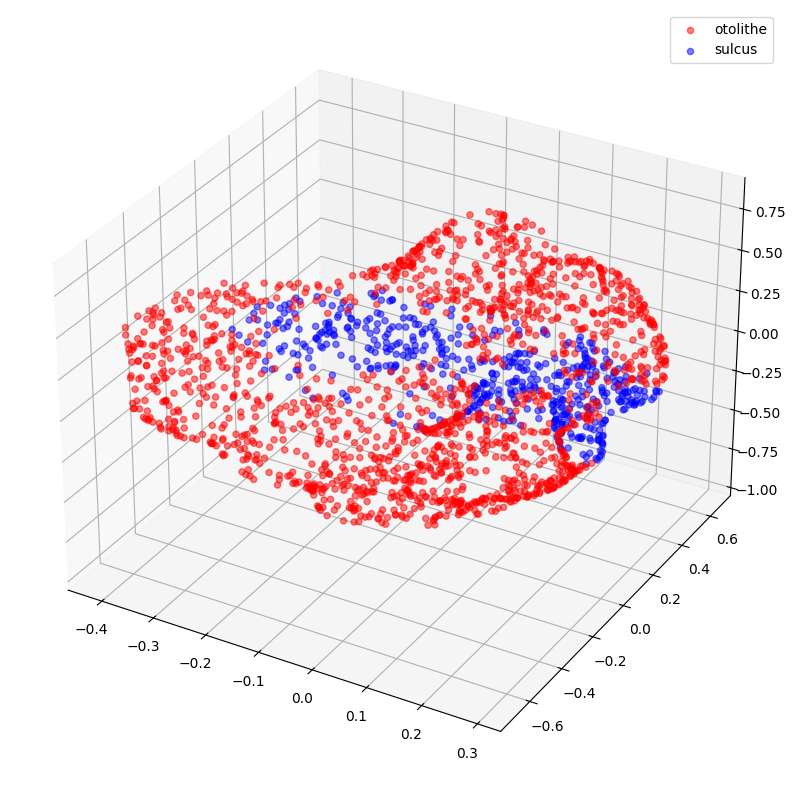

In [ ]:
visualize_data(train_points[0], all_labels[0])
visualize_data(train_points[15], all_labels[15])

In [ ]:
#préparation des données pour l'entraînement

##  Préparation des données
### Chargement
def load_data(point_cloud_batch, label_cloud_batch):
    point_cloud_batch.set_shape([NUM_SAMPLE_POINTS, 3])
    label_cloud_batch.set_shape([NUM_SAMPLE_POINTS, len(LABELS) + 1])
    return point_cloud_batch, label_cloud_batch

### Ajout de bruit
def augment(point_cloud_batch, label_cloud_batch):
    noise = tf.random.uniform(
        tf.shape(label_cloud_batch), -0.001, 0.001, dtype=tf.float64
    )
    point_cloud_batch += noise[:, :, :3]
    return point_cloud_batch, label_cloud_batch

### generer un dataset modifié
def generate_dataset(point_clouds, label_clouds, is_training=True):
    dataset = tf.data.Dataset.from_tensor_slices((point_clouds, label_clouds))
    dataset = dataset.shuffle(BATCH_SIZE * 100) if is_training else dataset
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size=BATCH_SIZE)
    dataset = (
        dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
        if is_training
        else dataset
    )
    return dataset

### split test train
split_index = int(len(train_points) * (1 - VAL_SPLIT))
train_point_clouds = train_points[:split_index]
train_label_cloud = point_cloud_labels[:split_index]
total_training_examples = len(train_point_clouds)

val_point_clouds = train_points[split_index:]
val_label_cloud = point_cloud_labels[split_index:]

print("Num train point clouds:", len(train_point_clouds))
print("Num train point cloud labels:", len(train_label_cloud))
print("Num val point clouds:", len(val_point_clouds))
print("Num val point cloud labels:", len(val_label_cloud))

train_dataset = generate_dataset(train_point_clouds, train_label_cloud)
val_dataset = generate_dataset(val_point_clouds, val_label_cloud, is_training=False)

print("Train Dataset:", train_dataset)
print("Validation Dataset:", val_dataset)

Num train point clouds: 18
Num train point cloud labels: 18
Num val point clouds: 5
Num val point cloud labels: 5
Train Dataset: <_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 2048, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 2048, 3), dtype=tf.float64, name=None))>
Validation Dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 2048, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 2048, 3), dtype=tf.float64, name=None))>


In [ ]:
# Construction architecture de reseaux de neurones pour la segmentation
def conv_block(x, filters, name):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid", name=f"{name}_conv")(x)
    x = layers.BatchNormalization(name=f"{name}_batch_norm")(x)
    return layers.Activation("relu", name=f"{name}_relu")(x)

## Perceptron
def mlp_block(x, filters, name):
    x = layers.Dense(filters, name=f"{name}_dense")(x)
    x = layers.BatchNormalization(name=f"{name}_batch_norm")(x)
    return layers.Activation("relu", name=f"{name}_relu")(x)

In [ ]:
# régularisateur orthogonal pour le réseau
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    """Reference: https://keras.io/examples/vision/pointnet/#build-a-model"""

    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.identity = keras.ops.eye(num_features)

    def __call__(self, x):
        x = keras.ops.reshape(x, (-1, self.num_features, self.num_features))
        xxt = keras.ops.tensordot(x, x, axes=(2, 2))
        xxt = keras.ops.reshape(xxt, (-1, self.num_features, self.num_features))
        return keras.ops.sum(self.l2reg * keras.ops.square(xxt - self.identity))

    def get_config(self):
        config = super().get_config()
        config.update({"num_features": self.num_features, "l2reg_strength": self.l2reg})
        return config

In [ ]:
# réseau de transformation T-Net
def transformation_net(inputs, num_features, name):
    """
    Reference: https://keras.io/examples/vision/pointnet/#build-a-model.

    The `filters` values come from the original paper:
    https://arxiv.org/abs/1612.00593.
    """
    x = conv_block(inputs, filters=64, name=f"{name}_1")
    x = conv_block(x, filters=128, name=f"{name}_2")
    x = conv_block(x, filters=1024, name=f"{name}_3")
    x = layers.GlobalMaxPooling1D()(x)
    x = mlp_block(x, filters=512, name=f"{name}_1_1")
    x = mlp_block(x, filters=256, name=f"{name}_2_1")
    return layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=keras.initializers.Constant(np.eye(num_features).flatten()),
        activity_regularizer=OrthogonalRegularizer(num_features),
        name=f"{name}_final",
    )(x)


def transformation_block(inputs, num_features, name):
    transformed_features = transformation_net(inputs, num_features, name=name)
    transformed_features = layers.Reshape((num_features, num_features))(
        transformed_features
    )
    return layers.Dot(axes=(2, 1), name=f"{name}_mm")([inputs, transformed_features])

In [ ]:
#implementation de l'architecture pointnet
def get_shape_segmentation_model(num_points, num_classes):
    input_points = keras.Input(shape=(None, 3))

    # PointNet Classification Network.
    transformed_inputs = transformation_block(
        input_points, num_features=3, name="input_transformation_block"
    )
    features_64 = conv_block(transformed_inputs, filters=64, name="features_64")
    features_128_1 = conv_block(features_64, filters=128, name="features_128_1")
    features_128_2 = conv_block(features_128_1, filters=128, name="features_128_2")
    transformed_features = transformation_block(
        features_128_2, num_features=128, name="transformed_features"
    )
    features_512 = conv_block(transformed_features, filters=512, name="features_512")
    features_2048 = conv_block(features_512, filters=2048, name="pre_maxpool_block")
    global_features = layers.MaxPool1D(pool_size=num_points, name="global_features")(
        features_2048
    )
    global_features = keras.ops.tile(global_features, [1, num_points, 1])

    # Segmentation head.
    segmentation_input = layers.Concatenate(name="segmentation_input")(
        [
            features_64,
            features_128_1,
            features_128_2,
            transformed_features,
            features_512,
            global_features,
        ]
    )
    segmentation_features = conv_block(
        segmentation_input, filters=128, name="segmentation_features"
    )
    outputs = layers.Conv1D(
        num_classes, kernel_size=1, activation="softmax", name="segmentation_head"
    )(segmentation_features)
    return keras.Model(input_points, outputs)

In [ ]:
# extraction et configuration de données pour le modele
x, y = next(iter(train_dataset))

num_points = x.shape[1]
num_classes = y.shape[-1]

segmentation_model = get_shape_segmentation_model(num_points, num_classes)
segmentation_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, 3)        │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 64)       │            256 │ input_layer[0][0]      │
│ (Conv1D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 64)       │            256 │ input_transformation_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 64)       │              0 │ input_transformation_… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 128)      │          8,320 │ input_transformation_… │
│ (Conv1D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 128)      │            512 │ input_transformation_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 128)      │              0 │ input_transformation_… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 1024)     │        132,096 │ input_transformation_… │
│ (Conv1D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 1024)     │          4,096 │ input_transformation_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 1024)     │              0 │ input_transformation_… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d      │ (None, 1024)           │              0 │ input_transformation_… │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, 512)            │        524,800 │ global_max_pooling1d[… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, 512)            │          2,048 │ input_transformation_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_

 Total params: 7,369,804 (28.11 MB)

 Trainable params: 7,355,852 (28.06 MB)

 Non-trainable params: 13,952 (54.50 KB)

Steps per epoch: 9.
Total training steps: 450.


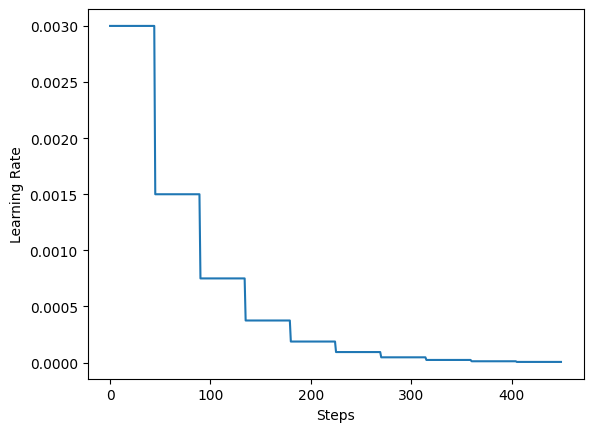

In [ ]:
#gestion de la plannification de taux d'apprentissage

## Calcul des étapes d'apprentissages
steps_per_epoch = total_training_examples // BATCH_SIZE
total_training_steps = steps_per_epoch * EPOCHS
print(f"Steps per epoch: {steps_per_epoch}.")
print(f"Total training steps: {total_training_steps}.")

# configuration de la decroissance du taux
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.003,
    decay_steps=steps_per_epoch * 5,
    decay_rate=0.5,
    staircase=True,
)

steps = range(total_training_steps)
lrs = [lr_schedule(step) for step in steps]

plt.plot(lrs)
plt.xlabel("Steps")
plt.ylabel("Learning Rate")
plt.show()

In [ ]:


def run_experiment(epochs):
    segmentation_model = get_shape_segmentation_model(num_points, num_classes)
    segmentation_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy"],
    )

    checkpoint_filepath = os.path.join(DATA_DIR, "checkpoint.weights.h5")
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_loss",
        save_best_only=True,
        save_weights_only=True,
    )

    history = segmentation_model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        callbacks=[checkpoint_callback],
    )

    segmentation_model.load_weights(checkpoint_filepath)
    return segmentation_model, history


segmentation_model, history = run_experiment(epochs=EPOCHS)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.2230 - loss: 62.3611 - val_accuracy: 0.7107 - val_loss: 1.5960
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.7232 - loss: 30.0985 - val_accuracy: 0.3025 - val_loss: 2.6383
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7205 - loss: 8.0817 - val_accuracy: 0.6466 - val_loss: 7.2102
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7007 - loss: 5.6149 - val_accuracy: 0.7107 - val_loss: 46.3928
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7199 - loss: 10.5469 - val_accuracy: 0.7107 - val_loss: 61.3587
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7219 - loss: 6.8659 - val_accuracy: 0.7107 - val_loss: 149.1038
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7093 - loss: 4.1413 - val_accuracy: 0.3119 - val_loss: 108.5581
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.7357 - loss: 3.8849 - val_accuracy: 0.7107 - val_loss: 179.67

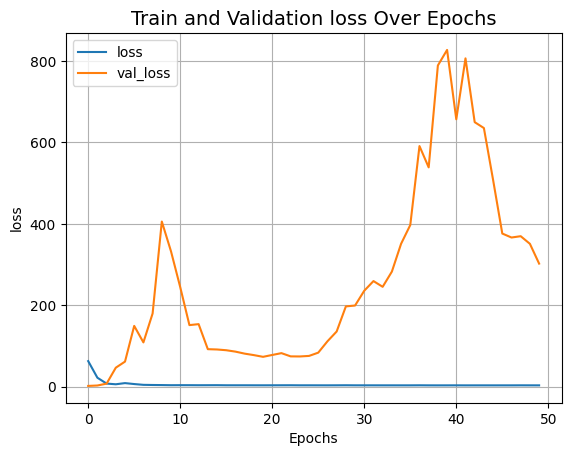

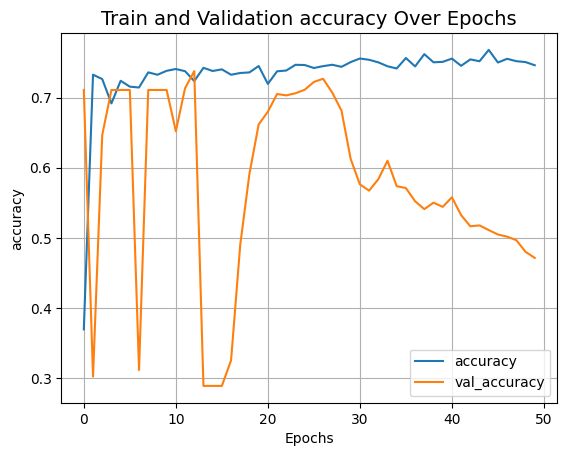

In [ ]:
#visualiser métriques d'entraînement
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("accuracy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Validation prediction shape: (2, 2048, 3)
Index selected: 1


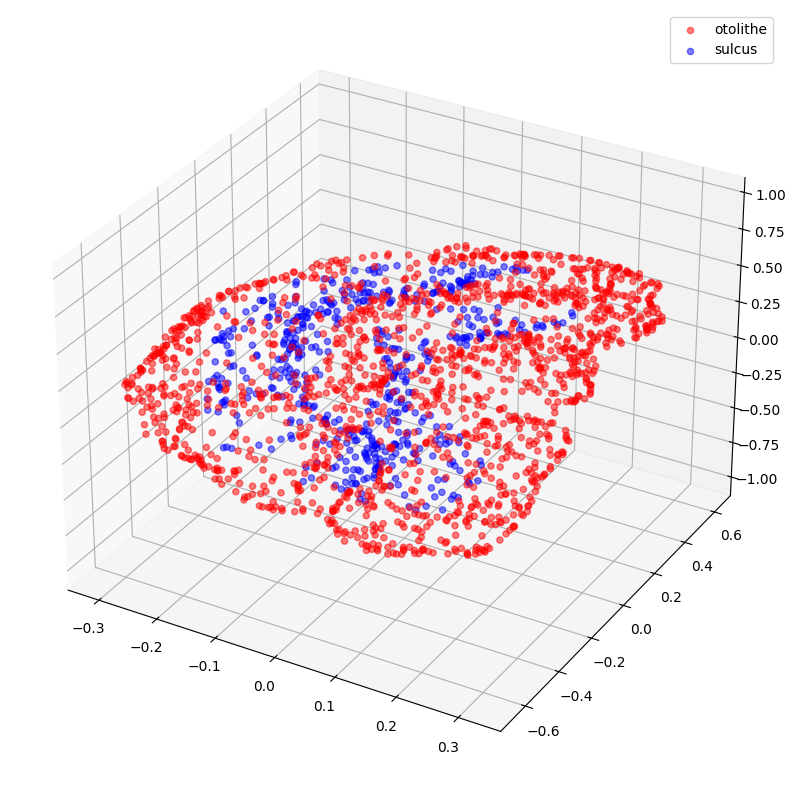

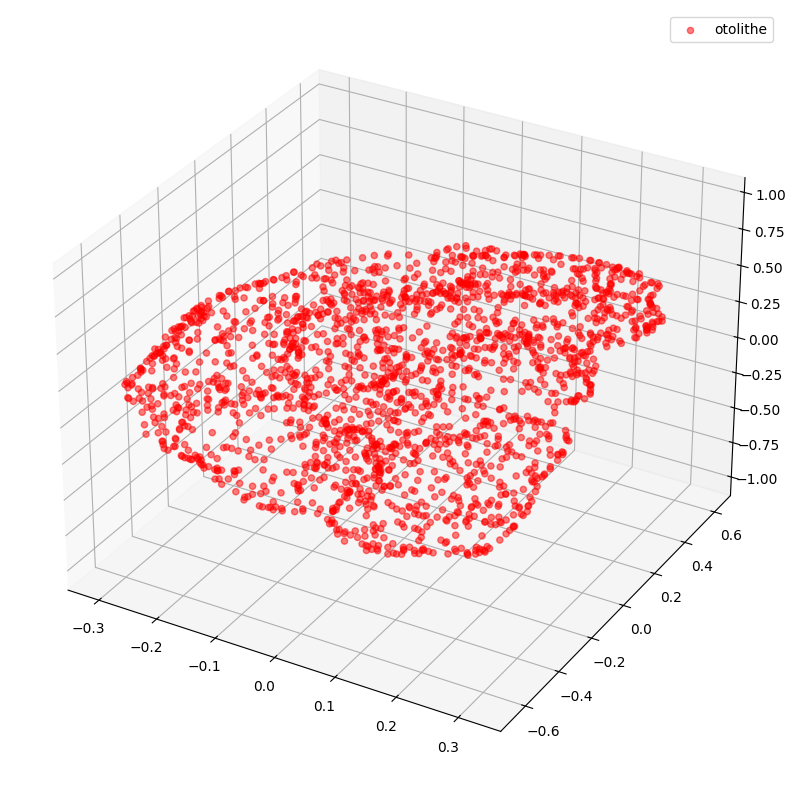

In [ ]:
validation_batch = next(iter(val_dataset))
val_predictions = segmentation_model.predict(validation_batch[0])
print(f"Validation prediction shape: {val_predictions.shape}")


def visualize_single_point_cloud(point_clouds, label_clouds, idx):
    label_map = LABELS + ["none"]
    point_cloud = point_clouds[idx]
    label_cloud = label_clouds[idx]
    visualize_data(point_cloud, [label_map[np.argmax(label)] for label in label_cloud])


idx = np.random.choice(len(validation_batch[0]))
print(f"Index selected: {idx}")

# Plotting with ground-truth.
visualize_single_point_cloud(validation_batch[0], validation_batch[1], idx)

# Plotting with predicted labels.
visualize_single_point_cloud(validation_batch[0], val_predictions, idx)